<a href="https://colab.research.google.com/github/sandipanpaul21/Dimensionality-Reduction-in-Python/blob/master/11_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Principal Component Analysis 

# It is where the data from high dimensional space is reduced to lower dimensions.
# In simple words, we transform our features into a lower number of artificial features 
# without losing much of the information
# In this method, features are transformed into a set of ‘artificial features’. 
# These ‘artificial features’ are known as Principal Components 
# where the first component contains most of the information that can be contained in a single ‘artificial feature’
# and we are left to select the number of components in order to reduce the features. 
# Here the features are not explicitly dropped rather the variation is extracted saving the loss of data.

In [2]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# Load the Datasets 

# Boston Dataset
boston = datasets.load_boston()
boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names
boston_pd["MEDV"] = boston.target
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Removing Response  variable

# As PCA works in an unsupervised learning setup, 
# therefore we will remove the dependent i.e. response variable from our dataset. 
# Note that PCA only works on numeric variables, 
# and that is why we create dummy variables for categorical variables. 
# As here we have only one categorical variable ‘Chas’ which is a binary categorical variable, 
# we don’t require creating dummy variable and can use all the independent variables for performing PCA.

BosData2 = boston_pd[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
                    'TAX','PTRATIO', 'B', 'LSTAT']]
BosData2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Scaling Features

# We will have to first scale the dataset to perform PCA in Python.
scale = StandardScaler()
scaled_data = scale.fit_transform(BosData2)
scaled_data

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [6]:
# We can change the above output into a dataset.

scaled_data = pd.DataFrame(scaled_data,columns=BosData2.columns)
scaled_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [7]:
# Splitting the dataset into train and test

# PCA should not be made to run on the entire dataset 
# As this would cause the dataset to leak thus causing overfitting
# Also, we should not perform PCA on train and test separately 
# as the level of variance will be different in both these datasets 
# which will the cause the final vectors of these two datasets to have different directions
# We first divide the dataset into train and test and perform PCA on train dataset 
# and transform the test dataset using that PCA model (which was fitted on the train dataset). 

# Target Variable
Y = boston_pd['MEDV']
X_train,X_test,Y_train,Y_test=train_test_split(scaled_data,Y,test_size=0.3,random_state=123) 

# Initialize and Fit PCA
# We first initialize PCA for having 13 components (for 13 continuous variables in the dataset) 
# and then we fit this model on the scaled features.

pca = PCA(n_components=13)
pca_model = pca.fit(X_train)
print(pca_model)

PCA(copy=True, iterated_power='auto', n_components=13, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [8]:
# Generate PCA Loadings

# We use transform command which transforms the scaled data to PCA loadings for each observation.
pca_train = pca_model.transform(X_train)
pca_train

array([[-2.20660682, -1.55051779,  1.69405915, ...,  0.41926072,
         0.12959831,  0.00521784],
       [-2.89522044,  0.63233154, -0.11783641, ..., -0.16824372,
         0.27292552,  0.19829253],
       [-1.32856526, -0.86934574, -0.67716436, ...,  0.45628438,
        -0.26832397,  0.13759222],
       ...,
       [-1.14293586,  0.00729923, -1.03490865, ..., -0.12767168,
         0.17449274,  0.07324418],
       [ 3.67339539,  0.22908568, -0.4579643 , ...,  0.33265531,
        -0.09832891,  0.12570271],
       [ 3.34152955,  0.53789073, -1.73620654, ..., -0.91230342,
        -0.58960347,  0.28672463]])

In [9]:
# Generate Loading Matrix

# We now generate the principal components loading matrix 
# by using the attribute components_ of the pca command for each variable.

Variable_Names =['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat'] 
Matrix = pd.DataFrame(pca_model.components_,columns=Variable_Names)
Matrix1 = np.transpose(Matrix)
Matrix1

# Inference :
# This Loading Matrix is like a correlation matrix. 
# The variable having the highest correlation with the columns will be the first principal component
#  For eg, the variable indus has the highest correlation with PC1, therefore, indus will be PC 1 
#  Heading in the output should be PC1, PC2 and so on. Will be renaming them in the upcoming steps

,0,1,2,3,4,5,6,7,8,9,10,11,12
crim,0.261028,0.402021,0.272849,0.083141,-0.056245,0.649569,0.433235,0.057887,0.215429,0.063131,-0.128398,0.064637,-0.040974
zn,-0.248594,0.378921,0.236975,0.288462,0.135785,0.023437,-0.443978,-0.463129,0.217877,0.354617,0.201162,-0.086564,0.058977
indus,0.344874,-0.105353,-0.039082,0.016200,0.008651,-0.099526,-0.308914,0.097501,0.734052,-0.271809,-0.226253,-0.045638,0.295420
chas,-0.004040,-0.306065,0.234459,0.740967,-0.490540,-0.166000,0.174522,0.017959,0.020874,-0.013390,0.009374,-0.031098,-0.040853
nox,0.340383,-0.191293,0.153285,0.059000,0.137624,0.007177,-0.244216,0.085684,-0.095101,0.281641,0.052457,0.798674,-0.074809
rm,-0.199428,-0.158725,0.640229,-0.421555,-0.181577,-0.063845,0.073905,-0.289464,0.115754,-0.383456,0.168155,0.174593,-0.044029
age,0.317344,-0.336219,0.057659,-0.063865,0.072904,0.098528,0.008672,-0.608906,-0.224804,0.154259,-0.522464,-0.211679,0.029531
dis,-0.320117,0.385590,-0.109335,0.173370,-0.051794,-0.110102,-0.067926,-0.104640,-0.137332,-0.381458,-0.596248,0.395582,0.009908
rad,0.306986,0.286627,0.257125,-0.048092,-0.234509,-0.073091,-0.206277,0.156843,-0.465397,-0.069271,0.068748,-0.124110,0.621425
tax,0.337749,0.234736,0.160595,-0.037207,-0.150966,-0.101342,-0.378124,0.140673,-0.110272,-0.148007,-0.072336,-0.242639,-0.713897


In [10]:
# Variance explained by each Principal Component

# We took the number of components for PCA equal to the number of variables in our dataset 
# which is 13 in our case 
# we will figure out the optimum value of the number of components to run PCA 
# i.e. reduce the number of components to be considered for the modeling algorithms 
# thus in a way reducing the number of features
# In order to decide the number of Principal Components, 
# we analyze the proportion of variance explained by each component
# We use the explained_variance function for computing variance explained by each Principal Component.

pca_model.explained_variance_

array([6.15535877, 1.3837924 , 1.17884792, 0.82071583, 0.7800156 ,
       0.66886856, 0.56912498, 0.38614551, 0.27744284, 0.22153714,
       0.19341501, 0.15764127, 0.0663099 ])

In [11]:
# Ratio of Variance explained by each component

# We can now look at the proportion of variance explained by each PC.
var = pca_model.explained_variance_ratio_
var

# Inference : 
# From the output we find that PC1 explains 47% of the variance, 
# PC2 explains 11% and so on. 
# We find that the first seven components explain approximately 90% of the variance 
# (0.478 + 0.107 + 0.091 + 0.063 + 0.060 + 0.052 + 0.044 = 0.898)

array([0.47867295, 0.10761095, 0.09167339, 0.06382316, 0.0606581 ,
       0.05201472, 0.04425814, 0.0300287 , 0.02157541, 0.01722789,
       0.01504097, 0.01225901, 0.00515661])

Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

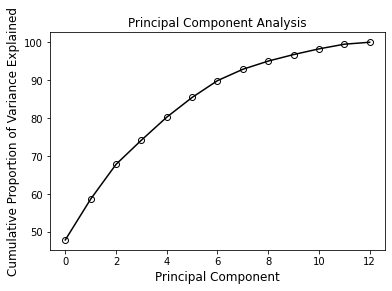

In [12]:
# PCA CHART

# In the above step, we got the proportion of variance explained by each component 
# which we need to decide the number of components. 
# We calculated that the first seven components explain most of the variance, 
# however, we plot the explained variance on a line graph. 
# Here we plot the ratio of variance explained by each component using a line graph. 
# This PCA chart helps us to decide the number of principal components to be taken for the modeling algorithm.

cumulative_var = np.cumsum(np.round(var, decimals=4)*100)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)


In [13]:
# Renaming Columns

# We will rename the columns of the loading matrix that was generated for each observation using PCA. 
# After renaming, we will select 7 principal components 
# and make a data frame with the dependent variable and the 7 PCs.

pca_train = pd.DataFrame(pca_train,columns=['PC_' + str(i) for i in range(1, 14)])
pca_train.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13
0,-2.206607,-1.550518,1.694059,1.829224,-2.345380,-0.699030,1.130661,-0.469812,0.581400,-0.291183,0.419261,0.129598,0.005218
1,-2.895220,0.632332,-0.117836,0.029440,0.111146,0.039596,0.070625,0.811305,0.094068,-0.318388,-0.168244,0.272926,0.198293
2,-1.328565,-0.869346,-0.677164,-0.369238,0.301381,0.432975,0.884145,0.255710,-0.509150,0.629288,0.456284,-0.268324,0.137592
3,2.894334,0.058086,0.311875,-0.535148,-0.709886,-0.038247,-1.237339,-0.022792,-0.471815,-0.210664,0.106260,0.289861,0.100084
4,3.388655,0.337146,0.722763,-0.542509,-0.758414,0.939876,-0.556901,-0.403837,-0.204815,-0.488596,0.338563,-0.027698,0.055221


In [14]:
# Concatenate Dependent variable and Principal Components

# We now concatenate the dependent variable i.e. "MEDV" with principal components and 
# Suppose take the first seven components for our analysis. 
# First, we will reset the index for Y_train as we need to concatenate datasets to make one whole train dataset. 
# Then we will remove the index variable from the dataset 
# and make a subset of the dataset having 7 PCs and the dependent variable.

Y_train1 = Y_train.reset_index()
 
pca_train1 = pd.concat([pca_train,Y_train1],axis=1)
pca_train2 = pca_train1.drop(columns='index')
pca_train3 = pca_train1[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7','MEDV']]
pca_train3.head()

# After this step, run any alogirthim as per your choice !!

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,MEDV
0,-2.206607,-1.550518,1.694059,1.829224,-2.345380,-0.699030,1.130661,35.2
1,-2.895220,0.632332,-0.117836,0.029440,0.111146,0.039596,0.070625,25.0
2,-1.328565,-0.869346,-0.677164,-0.369238,0.301381,0.432975,0.884145,36.2
3,2.894334,0.058086,0.311875,-0.535148,-0.709886,-0.038247,-1.237339,16.1
4,3.388655,0.337146,0.722763,-0.542509,-0.758414,0.939876,-0.556901,10.9
